In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import time


In [ ]:
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Iris.csv')
#data.head()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Removing the Id column from our dataset as it is not needed

In [ ]:
data.drop(columns = ['Id'], axis = 1, inplace = True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Multivariate Analysis
It refers to an analysis involving multiple dependent variables resulting in one outcome. Creating different graphs for all the features to perform bivariate analysis would be extremely tedious. Seaborn provides a convenient way to perform multivariate analysis using the pairplot function.

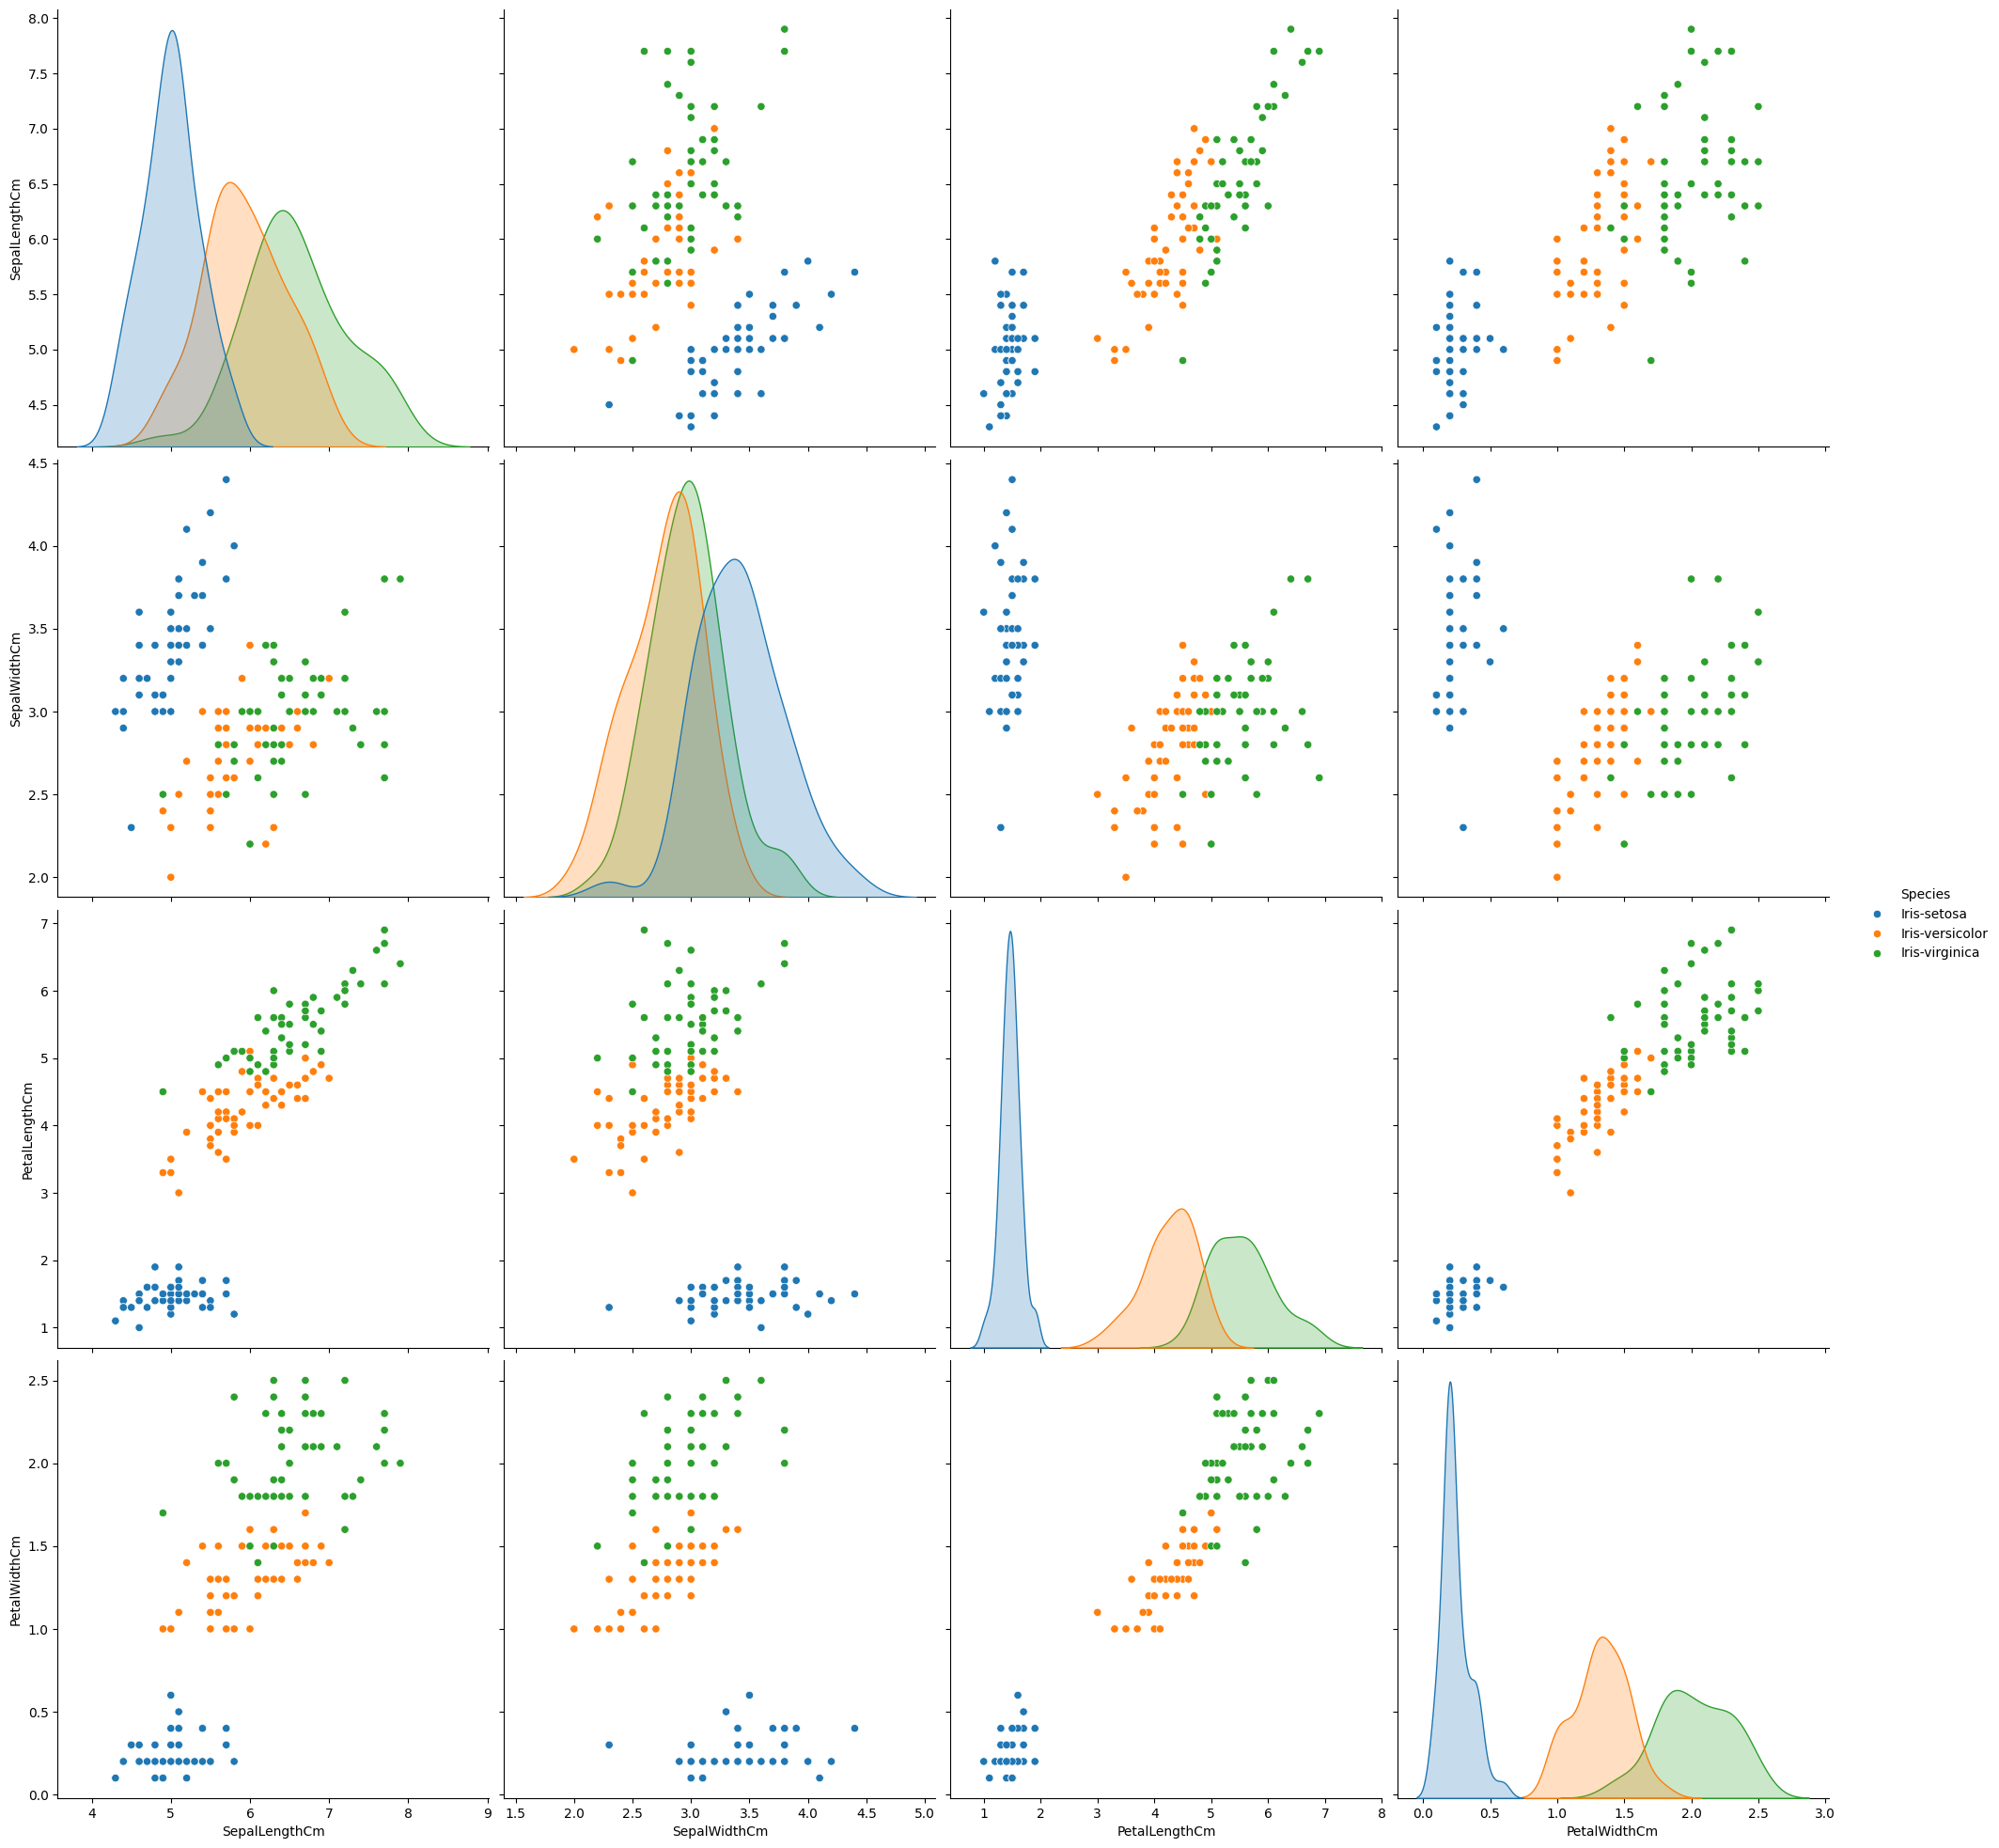

In [ ]:
sns.pairplot(data, hue = 'Species', height = 5)
plt.show()

# Split labels from Data

In [ ]:
X = data.drop(['Species'], axis = 1)
y = data['Species']


# Encoding the Categories for the Label

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
#y[:5]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

#X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Import TensorFlow

In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
# let's build a model to find patterns in it

# Set random seed
#tf.random.set_seed(42)

# Function to build, compile, and train the model with a given learning rate
def build_and_train_model(learning_rate):
    # Create a model
    model = tf.keras.Sequential([
               tf.keras.layers.Dense(3, activation='relu'),
               tf.keras.layers.Dense(5, activation='relu'),
               tf.keras.layers.Dense(3, activation='softmax')
    ])
    # Compile the model
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                   metrics=['accuracy'])

   # Fit the model
    history = model.fit(X_train,
                        y_train,
                        epochs=100,
                        verbose=1)

    # Measure the time to evaluate on test data
    start_time = time.time()  # Record start time before evaluation
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    end_time = time.time()  # Record end time after evaluation
    testing_time = end_time - start_time  # Calculate testing time

    print(f"Learning Rate: {learning_rate} - Testing Time: {testing_time:.2f} seconds")
    print(f"Test Accuracy: {test_accuracy:.2f}%")

    return history, testing_time, test_accuracy

# Experiment with different learning rates
learning_rates = [0.1]
results = []

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    history, testing_time, test_accuracy = build_and_train_model(lr)
    results.append((lr, testing_time, test_accuracy))



Training with learning rate: 0.1
Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 0.8675 - accuracy: 0.4500
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4951 - accuracy: 0.8000
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3443 - accuracy: 0.8417
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2677 - accuracy: 0.8917
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.3032 - accuracy: 0.8500
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2029 - accuracy: 0.9000
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1857 - accuracy: 0.9250
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1238 - accuracy: 0.9500
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0851 - accuracy: 0.9667
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0985 - accuracy: 0.

1/1 [==============================] - 0s 133ms/step - loss: 0.0125 - accuracy: 1.0000
Learning Rate: 0.1 - Testing Time: 0.19 seconds
Test Accuracy: 1.00%


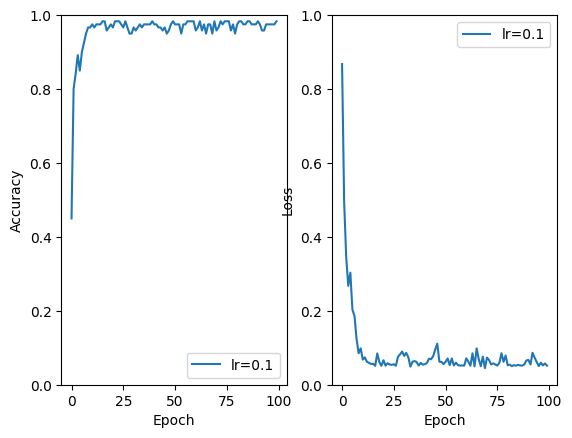

In [ ]:
# Plot results
for lr, testing_time, test_accuracy in results:
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label=f'lr={lr}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.0, 1.0])
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label=f'lr={lr}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim([0.0, 1.0])
    plt.legend(loc='upper right')

plt.show()



In [ ]:

#from sklearn.metrics import confusion_matrix


# Print the results for each learning rate
for lr, testing_time, test_accuracy in results:
    print(f"Learning Rate: {lr} - Testing Time: {testing_time:.2f} seconds - Test Accuracy: {test_accuracy * 100:.2f}%")

Learning Rate: 0.1 - Testing Time: 0.19 seconds - Test Accuracy: 100.00%
